In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
linkedin_df = pd.read_csv('linkedin-reviews.csv')
linkedin_df.head(10)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
5,This app is poor and bad. Linkedin app on my H...,1
6,Finally,5
7,Have been using DroidIn. Ability to move to SD...,4
8,Works fine on Samsung Captivate.,4
9,Clean design with limited features. How about ...,3


### Exploratory Data Analysis


#### Analyzing the distribution of Ratings

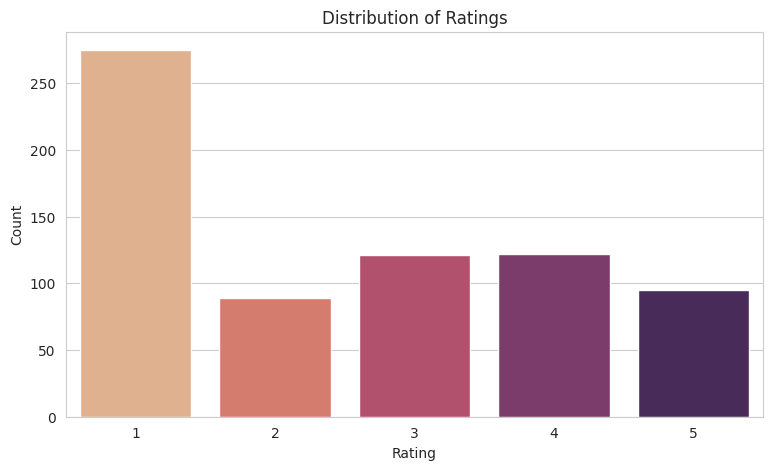

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 5))

sns.countplot(data=linkedin_df, x='Rating', hue='Rating', legend=False, palette='flare')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Analyze the length of the reviews, as there is often a correlation between review length and sentiment.

In [14]:
linkedin_df['Review Length'] = linkedin_df['Review'].apply(len)

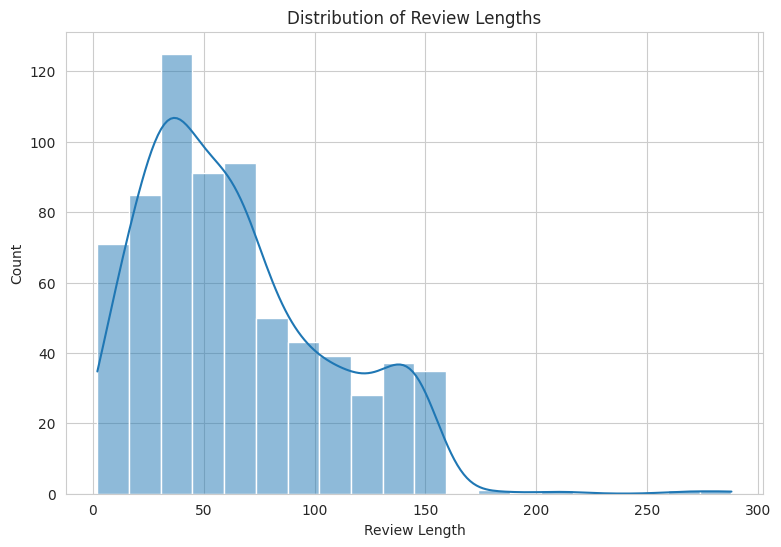

In [15]:
# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))

sns.histplot(data=linkedin_df, x='Review Length', bins=20, kde=True)

plt.title('Distribution of Review Lengths')
plt.show()

#### Enhance the dataset analysis by including sentiment labels.

In [16]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment

    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
linkedin_df['Sentiment'] = linkedin_df['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
print(linkedin_df.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


#### Analyzing App Reviews Sentiments

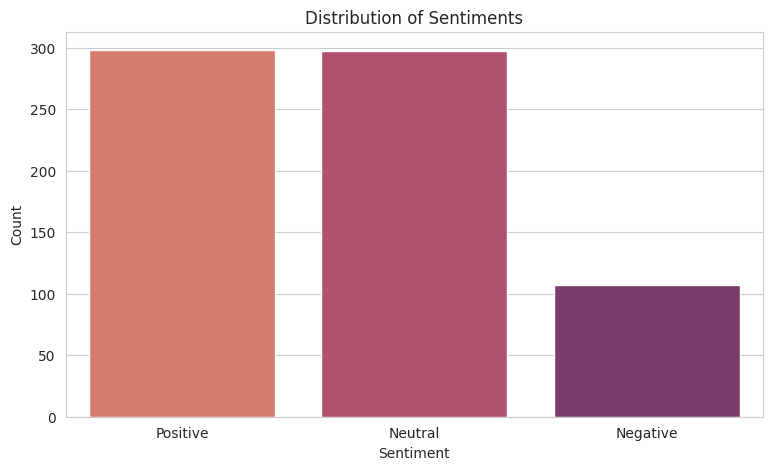

In [17]:
# Analyzing the distribution of sentiments
sentiment_distribution = linkedin_df['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, hue=sentiment_distribution.index, palette='flare')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#### Explore the relationship between the sentiments and the ratings

In [18]:
linkedin_df

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive
...,...,...,...,...
697,"Can't trust, Going to uninstall just for that ...",1,53,Neutral
698,It really gets me linked in with my friends. H...,5,72,Positive
699,It lacks most of what makes the other social n...,4,81,Positive
700,Really disappointed in the new version. Seems ...,2,123,Neutral


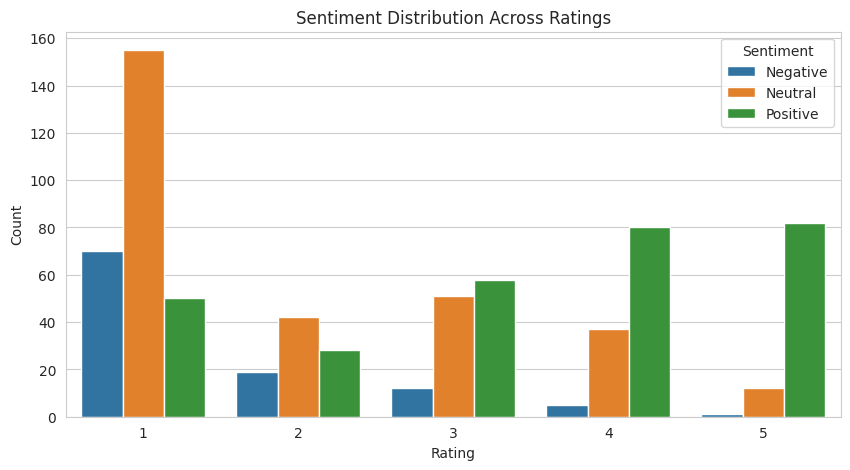

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=linkedin_df, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

#### Let's analyze text to find common words within each sentiment category.

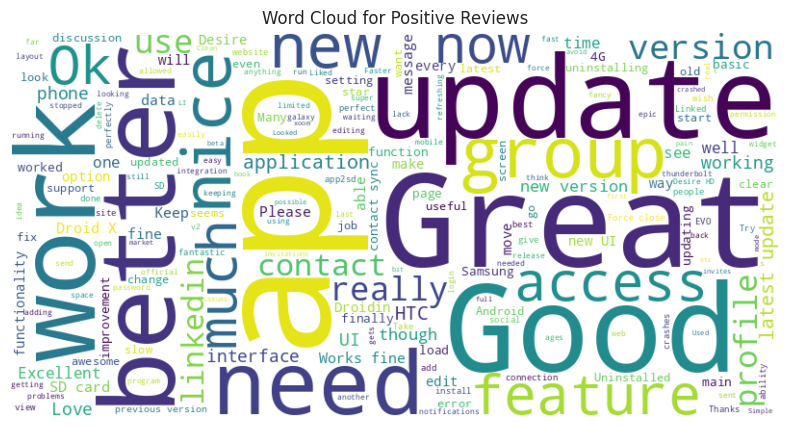

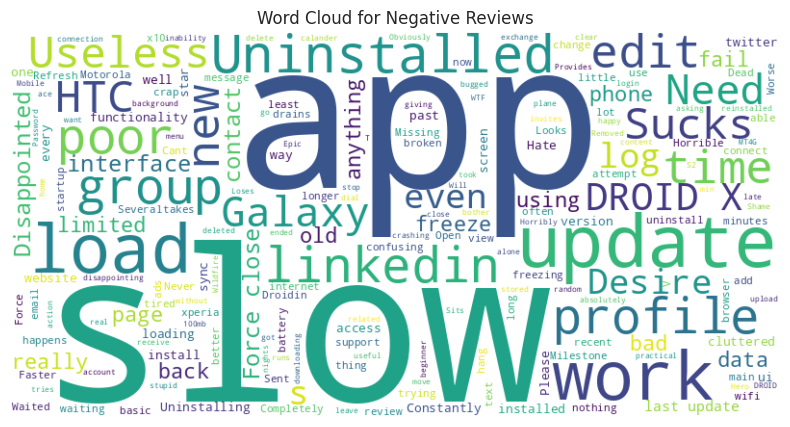

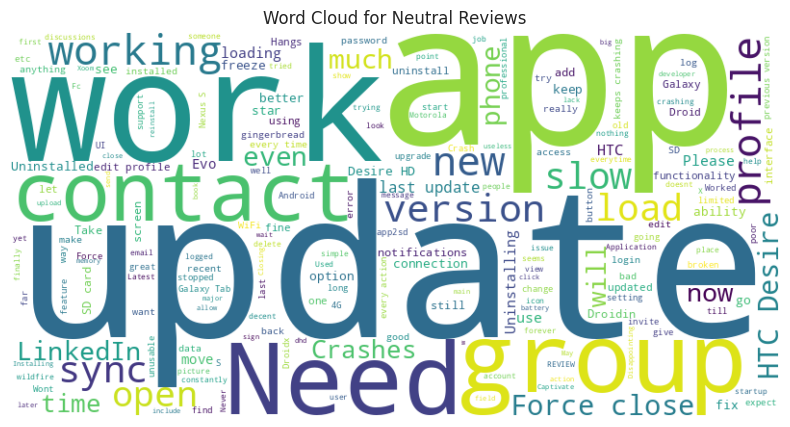

In [20]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_df[linkedin_df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)